# **MOVIE RATING PREDICTION WITH PYTHON**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *Importing Data*


In [ ]:
data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')

In [ ]:
print("------ Few Data samples -----")
print(data.head())

print("------ All columns -----")
print(data.columns)

------ Few Data samples -----
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angan



---


---



# **Data Preprocessing**


# *Handling Missing Values*

In [ ]:
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


Filling missing values for Director and Actors with "Unknown" and Mean value for ratings

In [ ]:
from sklearn.impute import SimpleImputer

data = data.dropna(subset=['Genre', 'Director','Rating','Actor 1'])
# data['Actor 1'] = data['Actor 1'].fillna('Unknown')
data['Actor 2'] = data['Actor 2'].fillna('Unknown')
data['Actor 3'] = data['Actor 3'].fillna('Unknown')

# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(data['Rating'].values.reshape(-1, 1))
# data['Rating'] = imputer.transform(data['Rating'].values.reshape(-1, 1))
# data.isnull().sum()

<ipython-input-277-4c959e11208b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Actor 2'] = data['Actor 2'].fillna('Unknown')
<ipython-input-277-4c959e11208b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Actor 3'] = data['Actor 3'].fillna('Unknown')


In [ ]:
data= data.drop(['Name','Year','Duration','Votes'],axis=1)
data.head(150)

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...
237,Action,4.2,S.V. Rajendra Singh Babu,Avtar Gill,Rajiv Kapoor,Padmini Kolhapure
239,"Action, Drama",4.8,David Dhawan,Sunny Deol,Dimple Kapadia,Archana Puran Singh
242,Action,4.8,Kanti Shah,Dharmendra,Sadashiv Amrapurkar,Asrani
243,"Action, Thriller",3.4,S.R. Pratap,Bipasha,Hemant Birje,Sudhir Dalvi


# *Encoding categorical Variables*

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Split the genres by the delimiter ',' and expand them into separate rows
data['Genre'] = data['Genre'].str.split(', ')

mlb = MultiLabelBinarizer()

genre_encoded = pd.DataFrame(mlb.fit_transform(data['Genre']),
                             columns=mlb.classes_,
                             index=data.index)

# Add the new binary genre columns back to the dataset
data = pd.concat([data, genre_encoded], axis=1)
# Drop the original 'Genre' column
data = data.drop('Genre', axis=1)
data.tail()

,Rating,Director,Actor 1,Actor 2,Actor 3,Action,Adventure,Animation,Biography,Comedy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
15501,5.3,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15503,5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15504,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15505,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15508,6.2,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assign IDs to Directors
director_encoder = LabelEncoder()
data['Director_ID'] = director_encoder.fit_transform(data['Director'].fillna('Unknown'))

# Assign IDs to Actors
for col in ['Actor 1', 'Actor 2', 'Actor 3']:
    actor_encoder = LabelEncoder()
    data[f'{col}_ID'] = actor_encoder.fit_transform(data[col].fillna('Unknown'))
data.head()

,Rating,Director,Actor 1,Actor 2,Actor 3,Action,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Director_ID,Actor 1_ID,Actor 2_ID,Actor 3_ID
1,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,0,0,0,0,...,0,0,0,0,0,0,784,1757,2775,373
3,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,0,0,0,1,...,1,0,0,0,0,0,1691,1566,876,2543
5,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0,0,0,0,1,...,0,0,0,0,0,0,1939,498,85,2422
6,7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,0,0,0,0,...,1,0,0,0,1,0,2566,913,1363,2997
8,5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,0,0,0,0,...,0,0,0,1,0,0,168,2486,1435,1189


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the features (X) and target (Y)
# Exclude 'Director', 'Actor 1', 'Actor 2', 'Actor 3' columns, and 'Rating' will be our target variable
X = data.drop(['Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Y = data['Rating']

# Step 2: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:
# Step 3: Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Train the model on the training data
rf_model.fit(X_train, Y_train)

# Step 5: Make predictions on the test set
Y_pred = rf_model.predict(X_test)

In [ ]:
# Step 6: Evaluate the model using Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.687569827029111


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [ ]:
# Step 6: Evaluate the model using Mean Squared Error
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7072332156147756


In [ ]:

results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results)

       Actual  Predicted
6100      3.0      5.294
8556      6.9      5.846
7503      6.2      6.304
8071      8.0      6.290
12673     9.3      7.568
...       ...        ...
1391      4.6      5.497
490       3.8      6.268
5689      4.2      4.281
5562      4.4      6.571
324       6.2      6.553

[1542 rows x 2 columns]


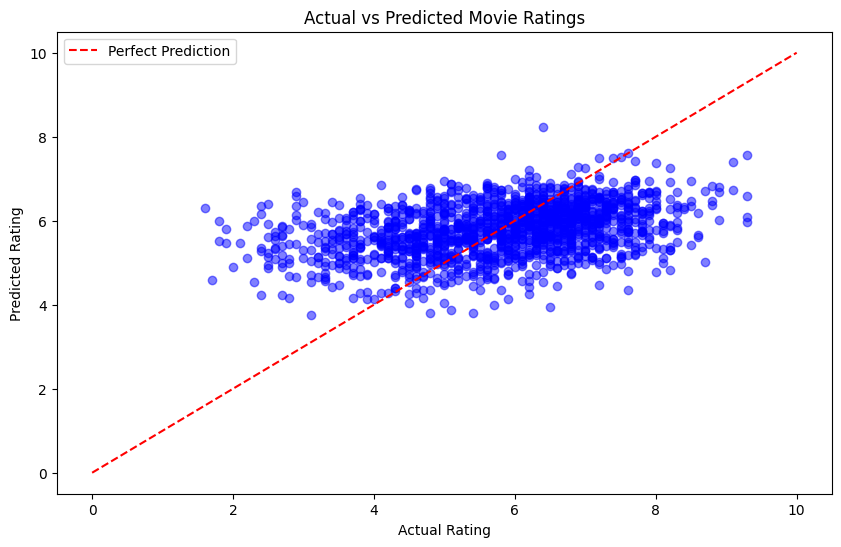

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(results['Actual'], results['Predicted'], color='blue', alpha=0.5)
plt.plot([0, 10], [0, 10], color='red', linestyle='--', label="Perfect Prediction")  # Diagonal line representing perfect prediction
plt.title('Actual vs Predicted Movie Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.legend()
plt.show()

<ipython-input-293-c68b86db19a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rating'], color='g')


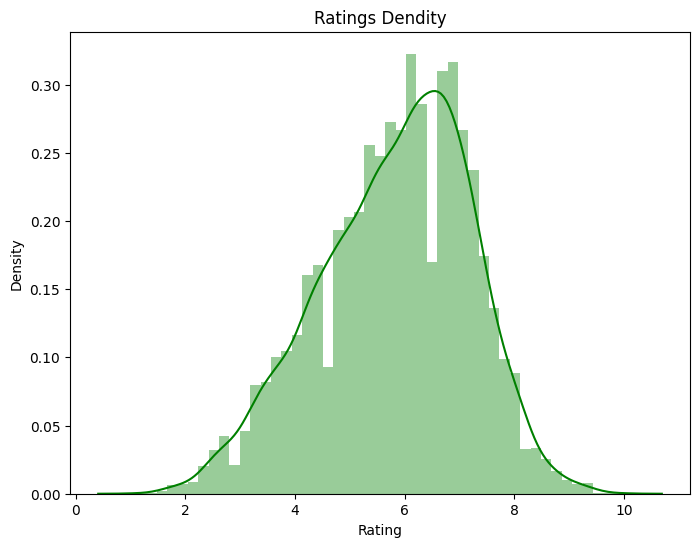

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(data['Rating'], color='g')
plt.title('Ratings Dendity')
plt.show()

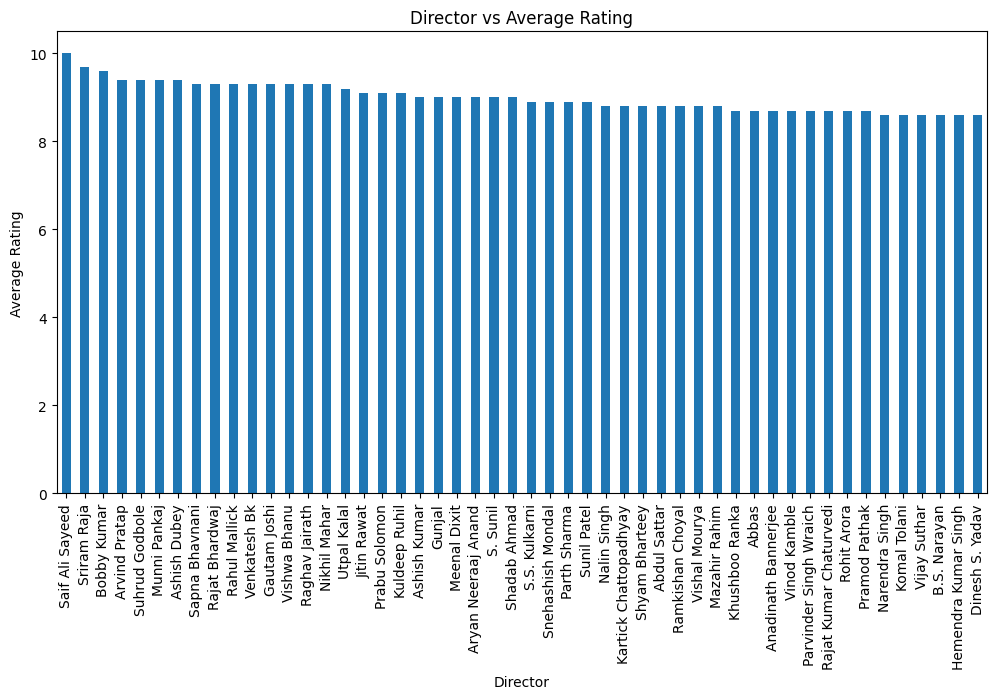

In [ ]:
plt.figure(figsize=(12, 6))
avg_ratings = data.groupby('Director')['Rating'].mean().sort_values(ascending=False)
avg_ratings.head(50).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Director vs Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()
